In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.ticker as mticker
import numpy as np
import cartopy.crs as ccrs

**Griding and Plotttin EECRA** </br>
In this text file, JJA 1952 is gridded and plotted using the 0-360 lon in an attempt to show to full map. It works for the 5yr seasonal!!

In [3]:
path = "data/EECRA/ocean_seasonal/"
df = pd.read_csv(path+'df_JJA52.csv')

df_counts = df.loc[df["CL"].notna()]
lat_counts = df_counts['Lat']
lon_counts = df_counts['Lon']

df_fog= df.loc[df["CL"] == 11]
lat_fog = df_fog['Lat']
lon_fog = df_fog['Lon']

In [8]:
lat_bins = np.arange(-90, 91, 5)
lon_bins = np.arange(0, 361, 5)

In [9]:
#counts of LC observations
counts_LC, lat_edges, lon_edges = np.histogram2d(lat_counts, lon_counts, bins=[lat_bins, lon_bins])

#counts of fog
counts_fog, lat_edges, lon_edges = np.histogram2d(lat_fog, lon_fog, bins=[lat_bins, lon_bins])

#where there are less than 10 LC observations, the value is nan
counts_probOccurance_real = np.where(counts_LC <= 10, np.nan, counts_fog / counts_LC)

/var/folders/4m/h1r7bv6s65ggpt8gzk616wyh0000gn/T/ipykernel_51465/3992391576.py:8: RuntimeWarning: invalid value encountered in divide
  counts_probOccurance_real = np.where(counts_LC <= 10, np.nan, counts_fog / counts_LC)


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/cartopy/mpl/geoaxes.py:306: UserWarning: The colormap's 'bad' has been set, but in order to wrap pcolormesh across the map it must be fully transparent.
  return func(self, *args, **kwargs)


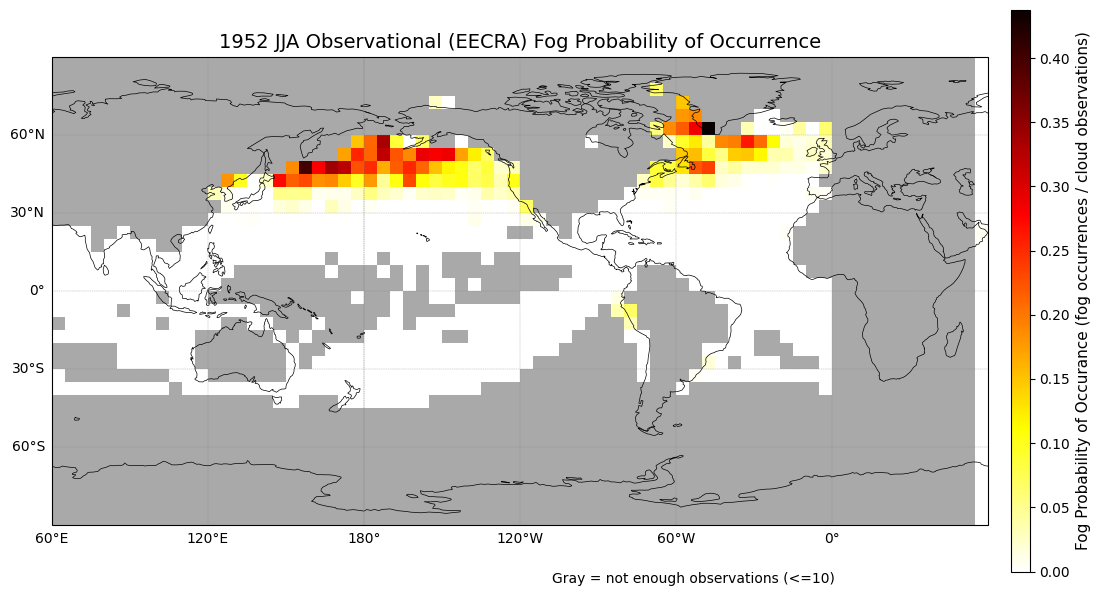

In [10]:
#grid of fog probability of occurance with gray
#  that is number of fog observations / total observations
#  where there are at least 10 observations
#  and where there is not, there is a gray square

#lon_edges_2 = list

lon_grid, lat_grid = np.meshgrid(lon_edges, lat_edges)

fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=240)})

counts_probOccurance_real_2 = np.hstack([counts_probOccurance_real[:, 4:],  counts_probOccurance_real[:, :5]])

cmap = plt.get_cmap('hot_r')
cmap.set_bad('darkgray', 1)
mesh = ax.pcolormesh(
    lon_grid,
    lat_grid,
    counts_probOccurance_real,
    cmap=cmap,
    shading='auto',
    transform=ccrs.PlateCarree()
)

# Add coastlines and gridlines
ax.coastlines(linewidth=0.5)
gl = ax.gridlines(draw_labels=True, linewidth=0.3, color='gray', alpha=0.7, linestyle='--')
gl.right_labels = False
gl.top_labels = False

# Add colorbar
cbar = plt.colorbar(mesh, ax=ax, orientation='vertical', pad=0.02, aspect=30)
cbar.set_label("Fog Probability of Occurance (fog occurrences / cloud observations)", fontsize = 11)

# Add title
ax.set_title("1952 JJA Observational (EECRA) Fog Probability of Occurrence", fontsize=14)

fig.text(0.7, 0.02, "Gray = not enough observations (<=10)", fontsize=10, ha="right")

plt.tight_layout()
plt.savefig("dataViz/EECRA_52JJA_FPO.png")
plt.show()

**grid from 5yr seasonal**

In [7]:
counts_probOccurance_real = pd.read_csv('data/EECRA/5yr_seasonal/counts_DJF1971.csv', sep=',', header=None)

lat_bins = np.arange(-90, 91, 5)
lon_bins = np.arange(0, 361, 5)

lon_grid, lat_grid = np.meshgrid(lon_bins, lat_bins)


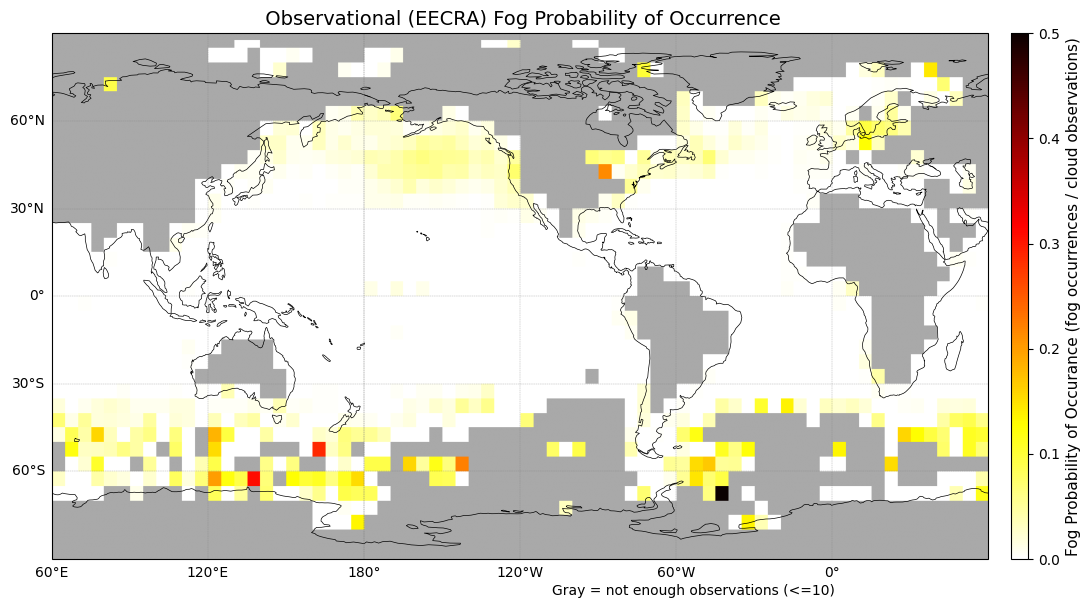

In [ ]:
masked = np.ma.masked_invalid(counts_probOccurance_real)

fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=240)})

cmap = plt.get_cmap('hot_r')
cmap.set_bad('darkgray')  # works fine with imshow

# Note: origin='lower' assumes lat from bottom to top
img = ax.imshow(
    masked,
    extent=[lon_bins[0], lon_bins[-1], lat_bins[0], lat_bins[-1]],
    cmap=cmap,
    origin='lower',
    transform=ccrs.PlateCarree(),
    aspect='auto'
)

# Add coastlines and gridlines
ax.coastlines(linewidth=0.5)
gl = ax.gridlines(draw_labels=True, linewidth=0.3, color='gray', alpha=0.7, linestyle='--')
gl.right_labels = False
gl.top_labels = False

# Add colorbar
cbar = plt.colorbar(img, ax=ax, orientation='vertical', pad=0.02, aspect=30)
cbar.set_label("Fog Probability of Occurance (fog occurrences / cloud observations)", fontsize = 11)

# Add title
ax.set_title(" Observational (EECRA) Fog Probability of Occurrence", fontsize=14)

fig.text(0.7, 0, "Gray = not enough observations (<=10)", fontsize=10, ha="right")

plt.tight_layout()
plt.show()